# Выявление закономерностей, определяющих успешность игр.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Содержание ##

### 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

### 2. Подготовьте данные

#### 2.1 Замените названия столбцов (приведите к нижнему регистру);
#### 2.2 Обработайте пропуски при необходимости
#### 2.3 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
#### 2.4 Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 
#### 2.5 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 3. Проведите исследовательский анализ данных

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
#### 3. 3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
#### 3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
#### 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
#### 3.6 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 4. Составьте портрет пользователя каждого региона

#### 4.1 Определите для пользователя каждого региона (NA, EU, JP):
#### 4.2 Самые популярные платформы (топ-5). Опишите различия в долях продаж.
#### 4.3 Самые популярные жанры (топ-5). Поясните разницу.
#### 4.4 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### 6. Напишите общий вывод

### 1. Откройте файл с данными и изучите общую информацию

Импортируем необходимые библиотеки

In [57]:
import pandas as pd #импортируем библиотеку pandas
import numpy as np #импортируем библиотеку numpy
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib для дальнейшего построения графиков
import seaborn as sns #импортируем библиотеку seaborn для создания статистических графиков

import math #импортируем библиотеку math
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime #импортируем библиотеку datetime
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from scipy import stats as st

In [58]:
games = pd.read_csv('/datasets/games.csv') #откроем файл

In [59]:
games.info() #выведем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [60]:
games.head(10) #выведем первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### 2. Подготовьте данные

#### 2.1 Замените названия столбцов (приведите к нижнему регистру);

In [61]:
games.columns = games.columns.str.lower() #приводим наименования колонок к нижнему регистру

In [62]:
games.head(15) #выводим таблицу, чтобы проверить результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [63]:
pd.DataFrame(round(games.isna().mean()*100, 1)).style.background_gradient('coolwarm') #посмотрим в каких колонках сколько % пропусков

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


#### 2.2 Обработайте пропуски при необходимости

Удалим пропуски по году релиза, т.к. эти данные не откуда взять (разве, что проставить вручную, но много строк), и пропусков 1.6%, что не сильно повлияет на дальнейший анализ, а также переведем в другой тип данных в колонках.

In [64]:
games = games.dropna(subset=['year_of_release']) #удаляем пропуски
games.reset_index(drop=True, inplace=True) #сбросим индексы
games['year_of_release'] = games['year_of_release'].astype('int') #перевеодим в тип данных integer

In [65]:
games['year_of_release'].unique() #провеяем

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [66]:
games.info() #проверим, поменялся ли тип данных в колонке year_of_release

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Думаю, что пропуски связаны с тем, что на момент сбора датафрейма, не все игры были оценены рейтингом, а также могли повлиять техническио ошибки при получении данных.

#### 2.3 Преобразуйте данные в нужные типы.

In [67]:
games['critic_score'].unique() #посмотрим, какие значения есть в колонке critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Мы видим, что после разделителя нет цифр, поэтому можно перевести в целые числа

In [68]:
games['critic_score'] = np.floor(pd.to_numeric(games['critic_score'], errors='coerce')).astype('Int64')

In [69]:
games['critic_score'].unique() #проверяем

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

Считаю, что не правильно менять пропуск на среднее/медианное значение, а также на 0, т.к. это будет считаться оценкой. А, учитывая большое количество прпусков, в дальнейшем повлияет на анализ.

In [70]:
games['user_score'].unique() #посмотрим, какие значения есть в колонке user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Здесь тоже самое.

#### 2.4 Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 

In [71]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
1.3       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

мы видим значения tbd, это значит что игру еще не оценили, правильнее всего будет не менять на среднее/медиану(по описанной выше причине), а заменить на -1 или NAN(что я и сделаю).

In [72]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True) #заменим tbd на nan
games['user_score'] = games['user_score'].astype(float) #переведем тип данных в float

In [73]:
games['user_score'].unique() #проверим резульат

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [74]:
games['rating'].unique() #посмотрим какие есть значения в колонке rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Прочитав про рейтинг ESRB, стало понятно, что "К-А" - устаревшее названия, теперь категория называется "Е", что значит Everyone. Поэтому заменим "К-А" на "Е".

In [75]:
games['rating'] = games['rating'].str.replace('K-A', 'E', regex=True) #заменяем "К-А" на "Е"

In [76]:
games['rating'].unique() #проверяем

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [77]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Заменим пропуски в колонке rating на unknown.

In [78]:
games['rating'] = games['rating'].fillna('unknown')

In [79]:
display(games) #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,unknown
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,unknown


#### 2.5 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [80]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1) #создадим колонку total_sales, куда сохраним сумму продаж в США, Европе, Японии и других регионах

In [81]:
games.head(10) #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,unknown,28.31


In [82]:
games.info() #проверим форматы колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В данном датасете мы видим очень много пропусков. В колонке year_of_release можно удалить, т.к. их мало. Пропуски в rating заменили на unknown, в колонке user_score значения tpd заменили на nan. Поменяли форматы данных в некоторых колонках, например в годе релиза, т.к. там целые числа.

### 3. Проведите исследовательский анализ данных

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. 

In [83]:
games_by_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count') # сделаем сводную таблицу с распределением колличества игр по годам

И построим график

<function matplotlib.pyplot.show(close=None, block=None)>

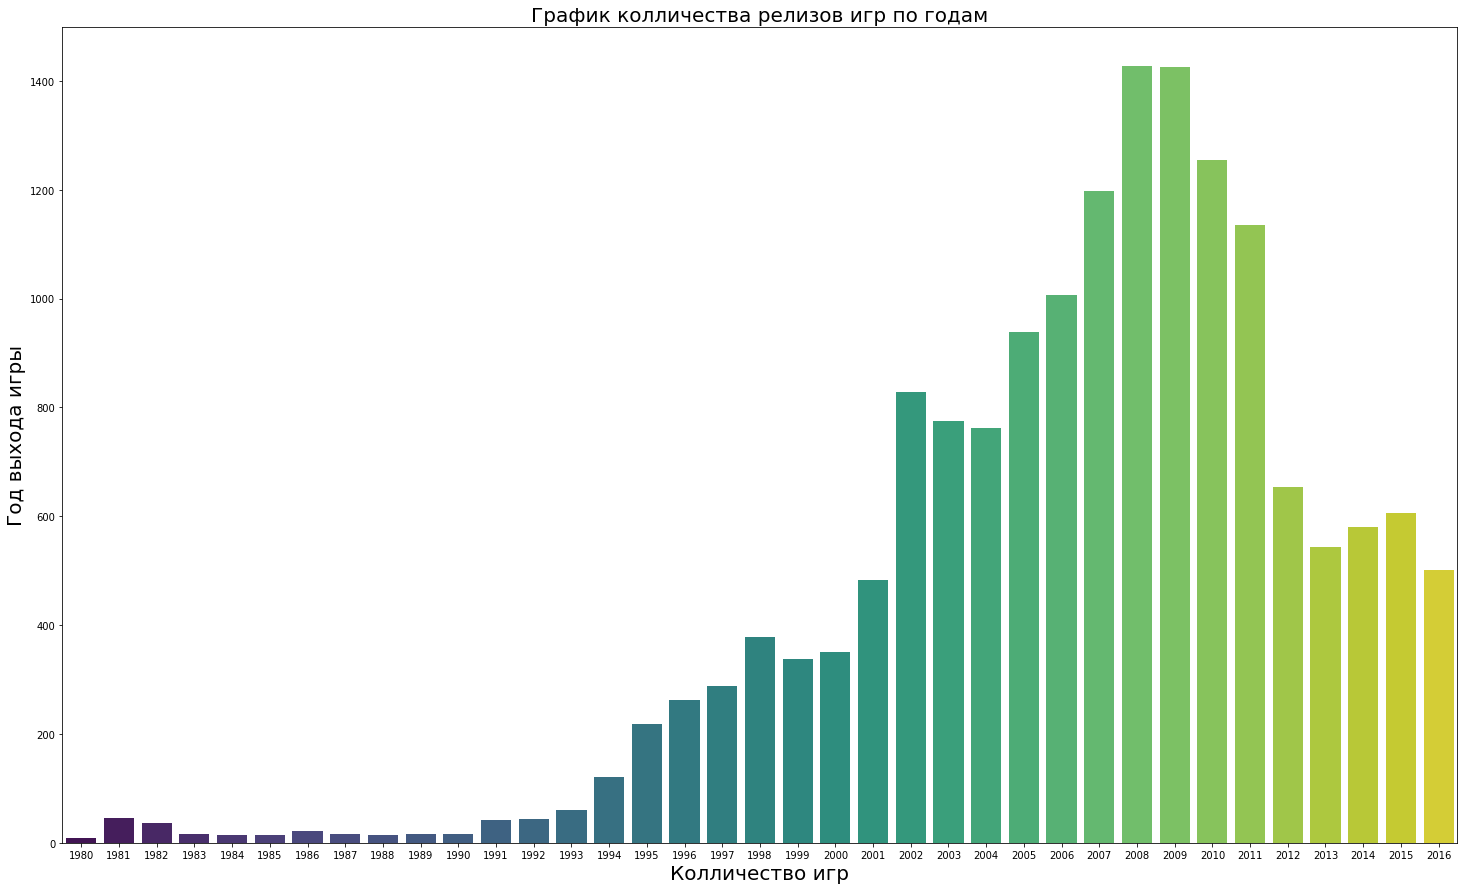

In [84]:
plt.figure(figsize=(25,15))
sns.barplot(x=games_by_year.index, y='name', data=games_by_year, color = 'green', palette = 'viridis')
plt.title('График колличества релизов игр по годам', fontsize = 20)
plt.xlabel("Колличество игр", fontsize = 20)
plt.ylabel("Год выхода игры", fontsize = 20)
plt.show

Мы видим, что пик выпуска игр приходится на 2002-2011 года. Думаю, что важнее информация начиная с 1995 года.

Удалим данные до 1994 года включительно, т.к. они нам не интересны.

In [85]:
games=games[games['year_of_release'] > 1994] 
games.reset_index(drop=True, inplace=True) #сбросим индексы

In [86]:
games['year_of_release'].unique() #проверяем

array([2006, 2008, 2009, 1996, 2005, 1999, 2007, 2010, 2013, 2004, 2002,
       2001, 2011, 1998, 2015, 2012, 2014, 1997, 2016, 2003, 2000, 1995])

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

Посмотрим, как менялись продажи по платформам. Для этого выберем платформы с наибольшими суммарными продажами и построем график с распределением по годам.
Изначально взял 15 платформ, но по кол-ву продаж после 6й по счету платформы идет спад почти в 2 раза. Поэтому возьмем первые 6 и сохраним в переменную top_platforms.

In [87]:
top_platforms = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').nlargest(6,'total_sales')
display(top_platforms)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55


Мы видим, что больше всего продаж у PS2, далее идет ее прямой конкурент от Microsoft - XBox360.

Построим график для наглядности

Text(0, 0.5, 'Количество продаж')

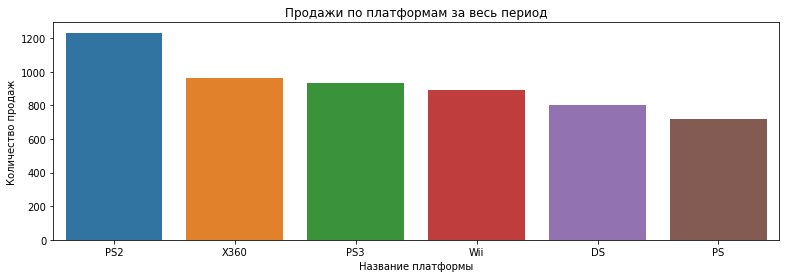

In [88]:
plt.figure(figsize=(13,4))
sns.barplot(x=top_platforms.index,y=top_platforms['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из полученной таблицы и графика видим, что самая популярная консоль PS2, на втором месте X-Box 360. Дата выхода PS2 - 2000г., а X-Box 360 - 2005г. С выходом этих консолей можно связать рост количества игр на первом графике.

Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. Для этого создадим переменную platforms.

Text(0.5, 1.0, 'Суммарные продажи по платформам')

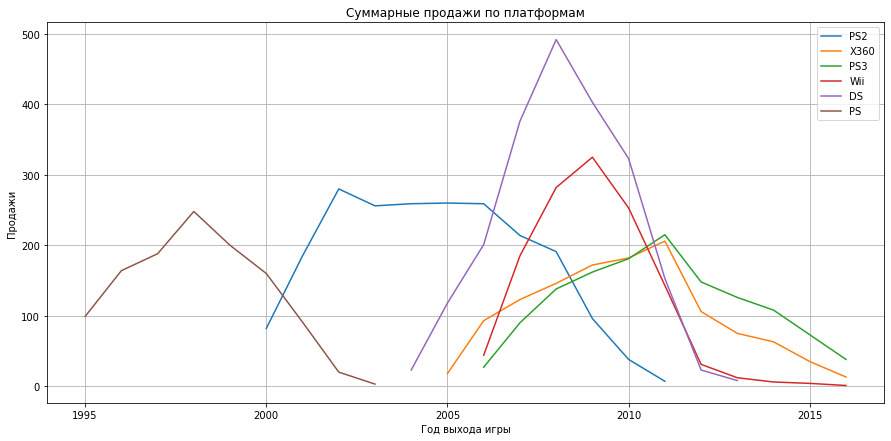

In [89]:
platforms = list(games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).index)[0:6]
plt.figure(figsize=(15,7))
for i in platforms:
    games[games['platform']==i].groupby(['year_of_release']).total_sales.agg("count").plot()

plt.grid(True)
plt.legend(platforms);
plt.xlabel('Год выхода игры')
plt.ylabel('Продажи')
plt.title('Суммарные продажи по платформам')

Мы видим, что:
- PS2 была популярная с 2000 по 2011г.
- X360 c 2005 по 2016г.
- PS3 c 2006 по 2016г.
- Wii c 2006 по 2016г.
- DS с 2004 по 2013г.
- PS с 1995 по 2003г.

Мы видим, что средняя "продолжительность жизни" консолей - 10 лет.

#### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.

Из прошлого анализа мы выяснили, что продолжительность жизни консолей - 10 лет. По графику видно, что почти у всех пик приходится где-то на середине продолжительности жизни, т.е. 5-6 лет. Чтобы построить прогноз на 2017г., предлагаю стартовой точкой 2012г.
UPD решил посмотреть данные начиная с 2014г., мне они показались более информативными

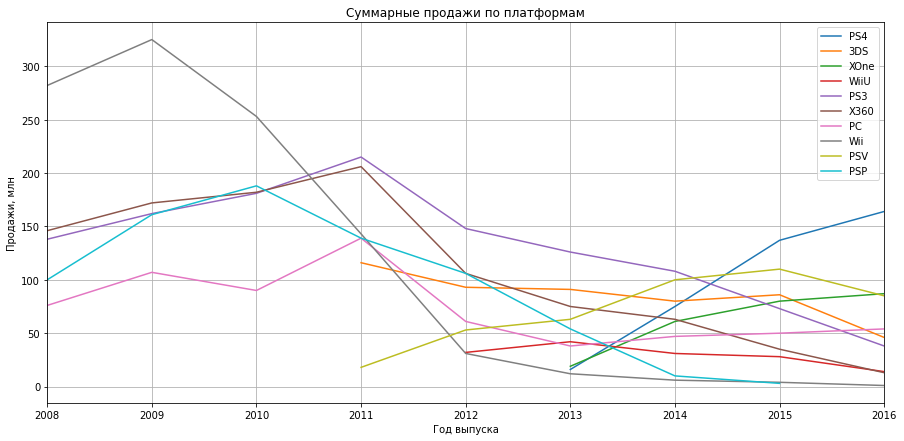

In [94]:
platforms = list(games[games['year_of_release']>=2014]['platform'].unique())
plt.figure(figsize=(15,7))
for i in platforms:
    games[games['platform']==i].groupby(['year_of_release']).total_sales.agg("count").plot()
plt.grid(True)
plt.legend(platforms)
plt.xlim(2008,2016)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн')
plt.title('Суммарные продажи по платформам');

По графику видно, что лидирует по продажам PS4, чуть меньше XOne. Это связано с их выходом в 2013г. Также видно что PC после спада немного растет. Думаю, что это связано с выходом каких-то популярных и долгожданных игр, а также существенным прорывом в графике.
На такие консоли как 3DS, WiiU, PS3, X360, Wii, PSV падают продажи, а PSP вообще в 2015г. прекратили продавать.

#### 3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Из предыдущего анализа мы получили график по 10 платформам. Из них PS4 и XOne набирают популярность, PC идет без скачков, PSP в 2015г. ушла с рынка. PS3 и X360 предлагаю исключить, т.к. это уже предыдущие модели. Wii тоже исключаем, т.к. продажи с 2015 по 2016г. приближаются к нулю, я сомневаюсь, что будет скачок. Таким образом, остаются у нас 6 платформ: PS4, 3DS, XOne, WiiU, PC, PSV.

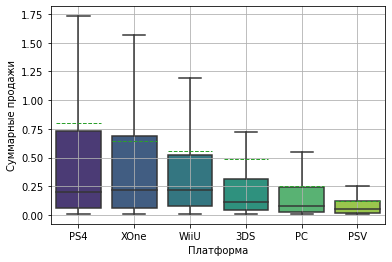

In [95]:
# Соберем в переменную top6_platform датафрейм с выбранными платформами и актуальным периодом продаж
top6_platform = games[
    ((games['platform']=='PS4') |
    (games['platform']=='3DS') |
    (games['platform']=='XOne') |
    (games['platform']=='WiiU') |
    (games['platform']=='PC') |
    (games['platform']=='PSV')) &
    (games['year_of_release']>=2012)
][['platform', 'total_sales']]

# отсортируем платформы по средним продажам
order = top6_platform.groupby('platform')['total_sales'].agg('mean').sort_values(ascending=False).index

# построим ящики с усами для каждой платформы без выбросов
sns.boxplot(
    x=top6_platform['platform'], 
    y=top6_platform['total_sales'], 
    order = order, 
    showfliers=False, 
    showmeans=True, 
    meanline=True,
    palette = 'viridis'
)
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи');
plt.show()

По графику видно, что продажи PS4 и XOne практически одинаковы. Это можно объяснить тем, что выход данных консолей состоялся одновременно, чаще всего на них выходят одинаковые игры. В принципе, в индустрии игровых консолей Sony PS и Microsoft XBox - это два гиганта, постоянно конкурирующих между собой. 

Text(0, 0.5, 'Суммарные продажи')

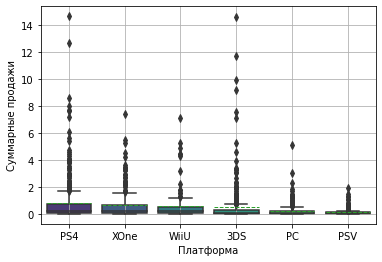

In [96]:
# построим ящики с усами для каждой платформы с выбросами
sns.boxplot(
    x=top6_platform['platform'], 
    y=top6_platform['total_sales'], 
    order = order, 
    showfliers=True, 
    showmeans=True, 
    meanline=True,
    palette = 'viridis'
)
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')

Данный график показывает, что в принципе, разброс по выручке на PS4 и XOne примерно одинаковый, а вот выбросов у PS4 большое.

Выпускается много игр, среди них есть доля провальных. Но их окупают самые популярные игры.

#### 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Посмотрим параметры распределений по платформам. 

In [97]:
top6_platform.groupby('platform').describe().sort_values(by=('total_sales', 'mean'),ascending=False)

total_sales                                                     
               count      mean       std   min   25%   50%     75%    max
platform                                                                 
PS4            392.0  0.801378  1.609456  0.01  0.06  0.20  0.7300  14.63
XOne           247.0  0.645020  1.036139  0.01  0.06  0.22  0.6850   7.39
WiiU           147.0  0.559116  1.058836  0.01  0.08  0.22  0.5250   7.09
3DS            396.0  0.491439  1.387161  0.01  0.04  0.11  0.3125  14.60
PC             250.0  0.250600  0.494640  0.01  0.03  0.08  0.2400   5.14
PSV            411.0  0.119659  0.203011  0.01  0.02  0.05  0.1200   1.96

Мы видим, что среднее значение сильно отличается от медианного.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Выберем платформу PS4 и построим граффик рассеивания по отзывам критиков.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

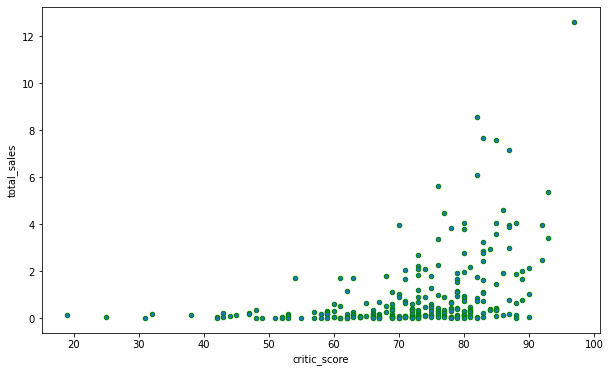

In [98]:
games_ps4 = games[(games['platform'] == 'PS4') & (games['critic_score'] > 0)].copy()
games_ps4.plot(kind='scatter', x='critic_score', y='total_sales', ec='green', figsize=(10,6))

Зависимости кол-ва продаж от оценки критиков не наблюдаю.

Теперь построим граффик рассеивания по отзывам пользователей.

-0.031957110204556376

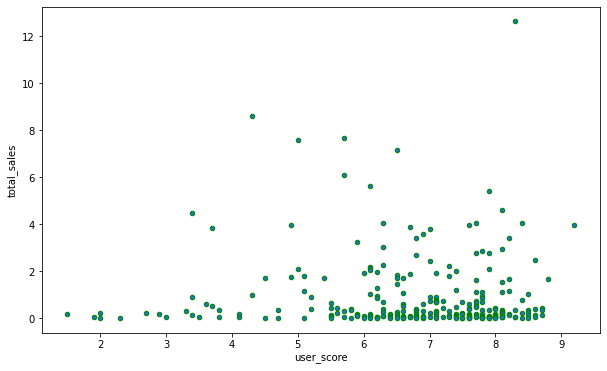

In [99]:
games_ps4 = games[(games['platform'] == 'PS4') & (games['user_score'] > 0)].copy()
games_ps4.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(10,6))

games_ps4['total_sales'].corr(games_ps4['user_score'])

Мы видим отрицательную корреляцию. Также зависимости кол-ва продаж от оценки пользователей не видно.

Посмотрим зависимости для XOne

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

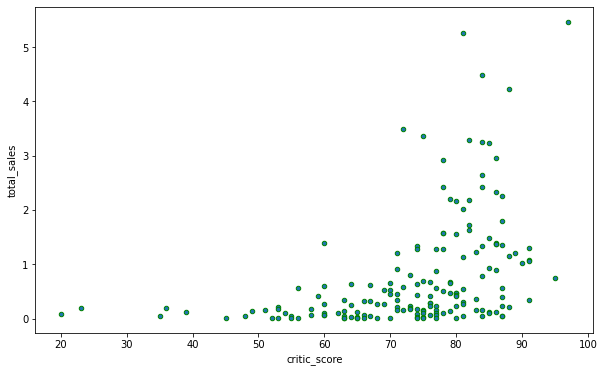

In [100]:
games_xone = games[(games['platform'] == 'XOne') & (games['critic_score'] > 0)].copy()
games_xone.plot(kind='scatter', x='critic_score', y='total_sales', ec='green', figsize=(10,6))

Здесь я тоже не вижу зависимости кол-ва продаж от рейтинга критиков.

-0.06892505328279412

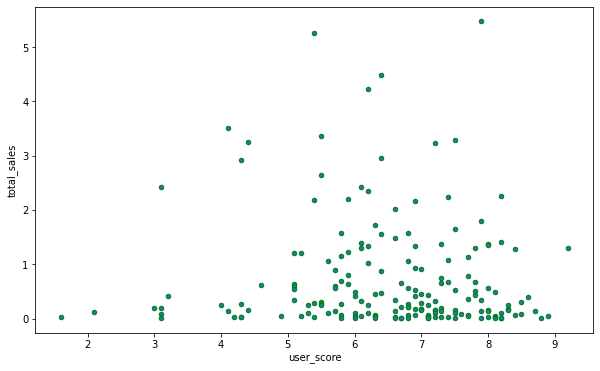

In [101]:
games_xone = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)].copy()
games_xone.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(10,6))

games_xone['total_sales'].corr(games_xone['user_score'])

Тут аналогично, кореляция тоже отрицательная, как в случае с PS4.

#### 3.6 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [102]:
games['genre'].unique() #посмотрим, какие жанры есть

array(['Sports', 'Racing', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Action', 'Puzzle', 'Shooter', 'Fighting',
       'Adventure', 'Strategy'], dtype=object)

In [105]:
games_by_genre = games.pivot_table(index='genre', values='name', aggfunc='count') # сделаем сводную таблицу с распределением колличества игр по жанрам

<function matplotlib.pyplot.show(close=None, block=None)>

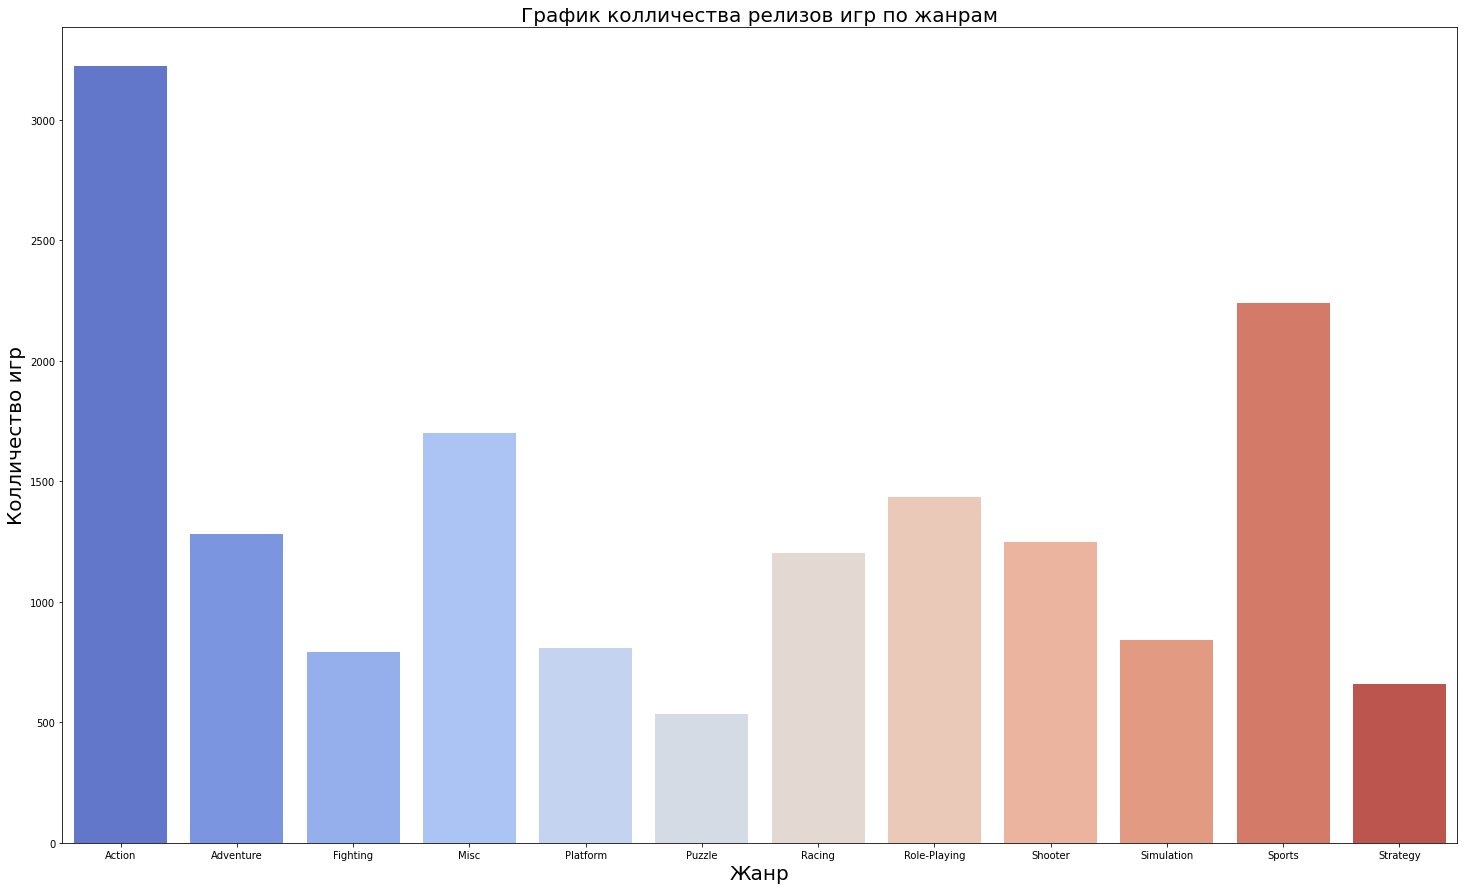

In [106]:
plt.figure(figsize=(25,15))
sns.barplot(x=games_by_genre.index, y='name', data=games_by_genre, palette = 'coolwarm')
plt.title('График колличества релизов игр по жанрам', fontsize = 20)
plt.xlabel("Жанр", fontsize = 20)
plt.ylabel("Колличество игр", fontsize = 20)
plt.show

Самые прибыльные жанры - Action, Sports и Misc. Жанры с низкими продажами: Puzzle и Strategy. 
P.S. теперь поменялись данные
    

In [107]:
games.groupby('genre')[['total_sales']].median().sort_values('total_sales', ascending=False)

,total_sales
genre,
Platform,0.240
Shooter,0.220
Sports,0.220
Fighting,0.200
Action,0.180
Racing,0.180
Role-Playing,0.180
Misc,0.160
Simulation,0.150


По медиане продаж видно, что наиболее популярные жанры: Platform, Shooter и Sports (у последних 2х одинаковое значение). Как мы видим, с данными из предыдущего графика совпал только жанр Sports.

### 4. Составьте портрет пользователя каждого региона

#### 4.1 Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишите различия в долях продаж.

Топ-5 платформ в NA, EU, JP

<AxesSubplot:title={'center':'Популярность платформ в Японии'}, ylabel='jp_sales'>

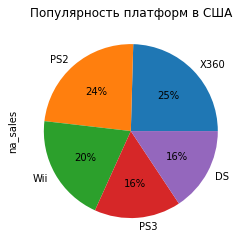

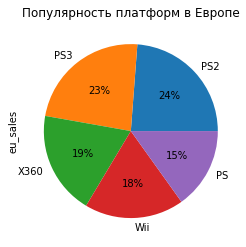

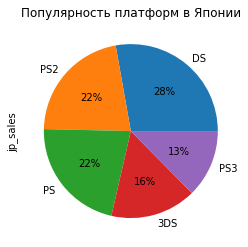

In [108]:
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', y="na_sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в США")
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', y="eu_sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в Европе")
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y="jp_sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в Японии")

#### 4.2 Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.

Топ-5 жанров в NA, EU, JP

<AxesSubplot:title={'center':'Популярность жанров в Японии'}, xlabel='genre'>

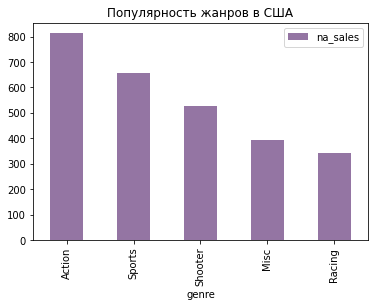

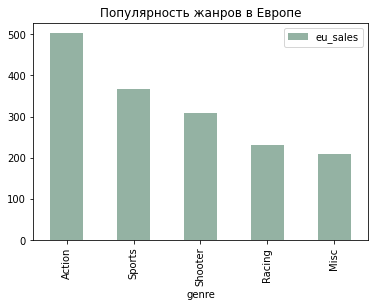

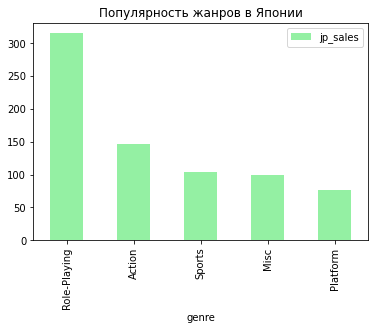

In [109]:
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color = (0.3,0.1,0.4,0.6), title = "Популярность жанров в США")
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color = (0.3,0.5,0.4,0.6), title = "Популярность жанров в Европе")
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color = (0.3,0.9,0.4,0.6), title = "Популярность жанров в Японии")

Самый популярный жанр в США и Европе Action, а в Японии Role-Playing.

#### 4.3 Определите для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

<AxesSubplot:title={'center':'Рейитнг игр в Японии'}, ylabel='jp_sales'>

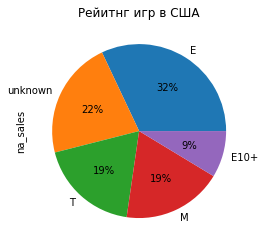

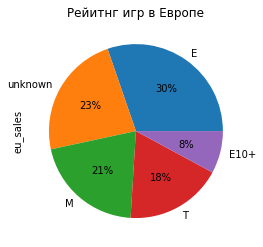

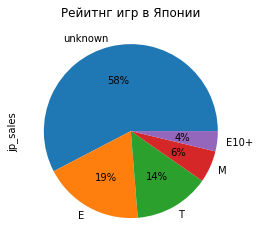

In [110]:
games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', y="na_sales", autopct='%1.0f%%', legend=False, title = "Рейитнг игр в США")
games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', y="eu_sales", autopct='%1.0f%%', legend=False, title = "Рейитнг игр в Европе")
games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y="jp_sales", autopct='%1.0f%%', legend=False, title = "Рейитнг игр в Японии")

Мы видим, что во всех 3х континентах чаще всего играют в игры с рейтингом "Е", что означает Everyone - для всех. Таким образом, мы можем составить портрет типичного для каждого континента игрока:
- В США это любого возраста, играющий в экшэны на XBox-360
- В Европе - также любого возраста, играющий в экшэны на PS2
- В Японии - любого возраста, играющий в игры жанра Role-Playing на платформе DS. Думаю, что рейтинг ESRB влияет на продажи игр.

### 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

- Нулевая гипотеза H0: средние пользовательские рейтинги платформ XOne и PC одинаковые
- Альтернативная гипотеза H1: средние пользовательские рейтинги платформ XOne и PC различаются

Возьмем α=5%, так как у нас очень много пропусков данных, есть риск ошибочно отвергнуть гипотизу.

In [111]:
mean_rating_xbox = games[(games['platform'] == 'XOne') & (games['user_score']>0)]['user_score']
mean_rating_pc = games[(games['platform'] == 'PC') & (games['user_score']>0)]['user_score']

results = st.ttest_ind(
    mean_rating_xbox,
    mean_rating_pc
)

alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.379956219356061e-06
Отвергаем нулевую гипотезу


Верно утверждение, что средние пользовательские рейтинги платформ XOne и PC различаются

#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные"

- Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports разные
- Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports одинаковые

Возьмем α=5%, так как у нас очень много пропусков данных, есть риск ошибочно отвергнуть гипотизу.

In [112]:
mean_rating_action = games[(games['genre'] == 'Action') & (games['user_score']>0)]['user_score']
mean_rating_sports = games[(games['genre'] == 'Sports') & (games['user_score']>0)]['user_score']

results = st.ttest_ind(
    mean_rating_action,
    mean_rating_sports
)

alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Верно утверждение, что средние пользовательские рейтинги жанров Action и Sports разные.

### 6. Напишите общий вывод

В ходе данного анализа было, проверено много различных данных, для формулирования выводов, какие факторы влияют на выбор определенной платформы среди пользователей. В полученном датасете много пропущенных значений. Учитывая. что почти 50% пропущенных данных в рейтингах, мы не можем их удалить или заменить, т.к. это сильно исказить итоговый результат. 
Тем не менее, из полученной информации мы выяснили, что средняя "продолжительность жизни" игровых платформ - 10 лет. В основном, конкуренция проходит между двумя гигантами: Sony PlayStation и Microsoft XBox. Поэтому, чтобы построить прогноз на 2017г., нужно обратить внимание на PS4 и XBox One, которые на тот момент только вышли и набирают популярность.
Так же был составлен портрет типичного игрока для определенного континента. Это игрок любого возраста, В США преимущественно играющий в экшэны на XBox-360, в Европе - играющий в экшэны на PS2. В Японии - игрок любого возраста, играющий в игры жанра Role-Playing на платформе DS.
Проверили две гипотезы и получили ответ, что средние пользовательские рейтинги платформ XOne и PC различаются и средние пользовательские рейтинги жанров Action и Sports разные.